starting
Loading graph from: C:/ms_bincode/Graph_1
Loading graph from: C:/ms_bincode/Graph_2
Loading graph from: C:/ms_bincode/Graph_3
Loading graph from: C:/ms_bincode/Graph_4
Loading graph from: C:/ms_bincode/Graph_5
Loading graph from: C:/ms_bincode/Graph_6
Loading graph from: C:/ms_bincode/Graph_7
Loading graph from: C:/ms_bincode/Graph_8
Loading graph from: C:/ms_bincode/Graph_9
Loading graph from: C:/ms_bincode/Graph_10
Loading graph from: C:/ms_bincode/Graph_11
Loading graph from: C:/ms_bincode/Graph_12
Loading graph from: C:/ms_bincode/Graph_13
Loading graph from: C:/ms_bincode/Graph_14
Loading graph from: C:/ms_bincode/Graph_15
Loading graph from: C:/ms_bincode/Graph_16
Loading graph from: C:/ms_bincode/Graph_17
Loading graph from: C:/ms_bincode/Graph_18
Loading graph from: C:/ms_bincode/Graph_19
Loading graph from: C:/ms_bincode/Graph_20
Loading graph from: C:/ms_bincode/Graph_21
Loading graph from: C:/ms_bincode/Graph_22
Loading graph from: C:/ms_bincode/Graph_23
Loading gra

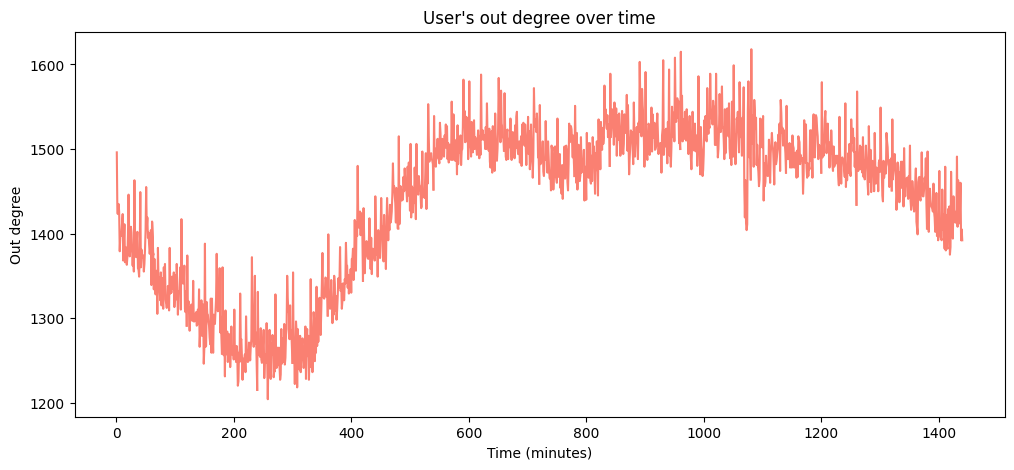

In [1]:
import os
import matplotlib.pyplot as plt
from raphtory import Graph
from raphtory import algorithms as rp

"""
Plot User node's interaction, specifically, the out degree.
Window size = 1 minute
"""

def load_graphs_lazy(graph_paths):
    """Generator function to lazily load graphs from files."""
    for path in graph_paths:
        if os.path.isfile(path):
            print(f"Loading graph from: {path}")
            yield Graph.load_from_file(path)
        else:
            print(f"File does not exist: {path}")
            yield None

graph_paths = [f"C:/ms_bincode/Graph_{i}" for i in range(1, 25)]

# Use the generator to iterate over graphs lazily
graphs_lazy = load_graphs_lazy(graph_paths)

# Initialise the plot with a set size
plt.figure(figsize=(12,5))

print("starting")

# Set a color for the plot line
line_colour = 'salmon'

# Keep track of the last point
last_time = 0
last_num_nodes = 0

# Iterate over each graph in the list
for g in graphs_lazy:
    if g is not None:  # Check if the graph is not None
        degree = []
        time = []
        for windowed_graph in g.vertex("USER").rolling(window=60000):
            result = windowed_graph.out_degree()
            degree.append(result)
            # Shift the time by the window size before converting to hours
            time_shifted = (windowed_graph.earliest_time + 60000) / 60000
            time.append(time_shifted)

        # If there is a last point, prepend it to this chunk to connect the lines
        if last_time != 0 and last_num_nodes != 0:
            time.insert(0, last_time)
            degree.insert(0, last_num_nodes)

        # Plot the current chunk
        plt.plot(time, degree, color=line_colour)

        # Update the last point
        last_time = time[-1]
        last_num_nodes = degree[-1]

plt.xlabel("Time (minutes)")
plt.ylabel("Out degree")
plt.title("User's out degree over time")

# Display the plot
plt.show()

# Pearson analysis

In [28]:
def lcc(graph):

    connected_components_map = rp.weakly_connected_components(graph, 3).group_by()

    lcc_key = 0
    key_length = 0

    for key, value in connected_components_map.items():
        length = len(value)
        if length > key_length:
            key_length = length
            lcc_key = key
    
    return graph.subgraph(connected_components_map.get(lcc_key))

Loading graph from: D:/Graph_5
Loading graph from: D:/Graph_6
Loading graph from: D:/Graph_7
Loading graph from: D:/Graph_8
Loading graph from: D:/Graph_9
Pearson correlation coefficient: 0.8708327239640653
P-value: 5.496631275882166e-32


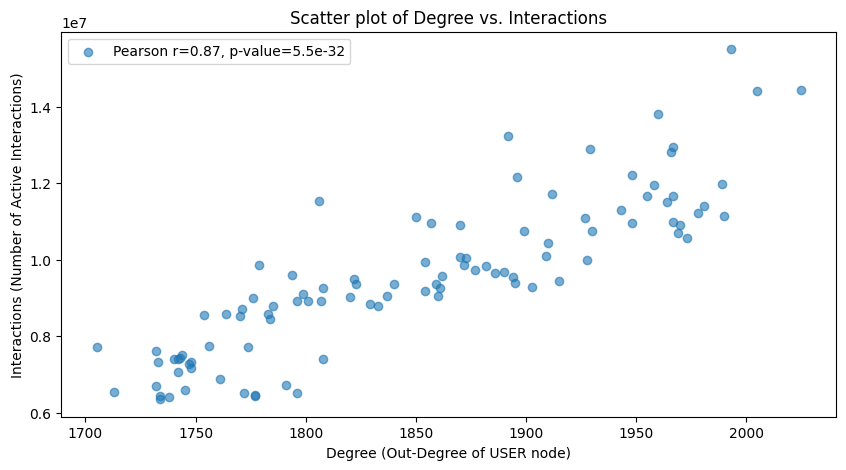

In [53]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from raphtory import Graph
from raphtory import algorithms as rp
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

def load_graphs_lazy(graph_paths):
    """Generator function to lazily load graphs from files."""
    for path in graph_paths:
        if os.path.isfile(path):
            print(f"Loading graph from: {path}")
            yield Graph.load_from_file(path)
        else:
            print(f"File does not exist: {path}")
            yield None

graph_paths = [f"D:/Graph_{i}" for i in range(5, 10)]

# Use the generator to iterate over graphs lazily
graphs_lazy = load_graphs_lazy(graph_paths)

# Initialise lists to store the data
degree = []
num_temp_edges = []
time = []

for graph in graphs_lazy:
    if graph is not None:
        for windowed_graph in graph.node("USER").rolling(window=180000): # 3 minutes
            degree_result = windowed_graph.out_degree()
            degree.append(degree_result)
            # Shift the time by the window size before converting to minutes
            time_shifted = (windowed_graph.earliest_time + 180000) / 60000
            time.append(time_shifted)
            
        for windowed_graph in graph.rolling(window=180000):
            interaction_result = windowed_graph.count_temporal_edges()
            num_temp_edges.append(interaction_result)

# Convert the lists to a pandas DataFrame
data = pd.DataFrame({
    'time': time,
    'degree': degree,
    'interactions': num_temp_edges
})

# Compute Pearson correlation
correlation, p_value = pearsonr(data['degree'], data['interactions'])

# Output the Pearson correlation coefficient and p-value
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(data['degree'], data['interactions'], alpha=0.6, label=f'Pearson r={correlation:.2f}, p-value={p_value:.2g}')
plt.title('Scatter plot of Degree vs. Interactions')
plt.xlabel('Degree (Out-Degree of USER node)')
plt.ylabel('Interactions (Number of Active Interactions)')
plt.legend()
plt.show()

Loading graph from: C:/ms_bincode/Graph_17
Loading graph from: C:/ms_bincode/Graph_18
Pearson correlation coefficient: 0.4452189455277799
P-value: 3.4847951926693186e-07


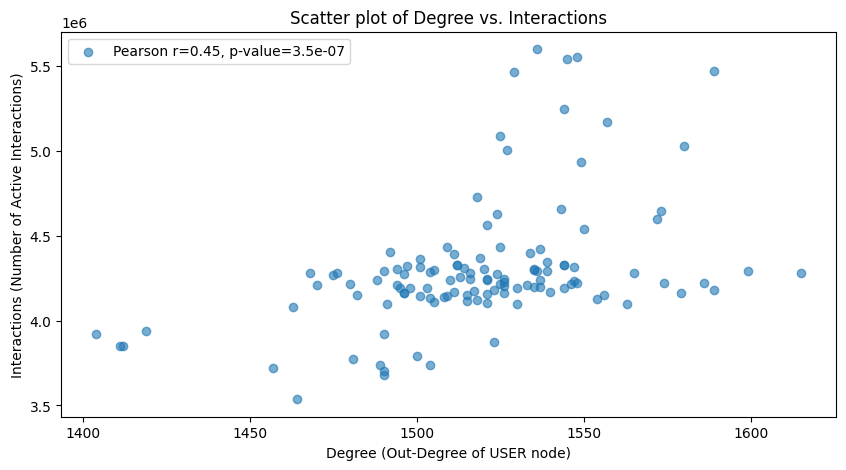

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from raphtory import Graph
from raphtory import algorithms as rp
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

def load_graphs_lazy(graph_paths):
    """Generator function to lazily load graphs from files."""
    for path in graph_paths:
        if os.path.isfile(path):
            print(f"Loading graph from: {path}")
            yield Graph.load_from_file(path)
        else:
            print(f"File does not exist: {path}")
            yield None

graph_paths = [f"C:/ms_bincode/Graph_{i}" for i in range(17, 19)]

# Use the generator to iterate over graphs lazily
graphs_lazy = load_graphs_lazy(graph_paths)


# Initialize lists to store the data
degree = []
num_temp_edges = []
time = []

for g in graphs_lazy:
    if g is not None:
        for windowed_graph in g.vertex("USER").rolling(window=60000): # 1 Minute
            degree_result = windowed_graph.out_degree()
            degree.append(degree_result)
            # Shift the time by the window size before converting to minutes
            time_shifted = (windowed_graph.earliest_time + 60000) / 60000
            time.append(time_shifted)
            
        for windowed_graph in g.rolling(window=60000):
            interaction_result = windowed_graph.count_temporal_edges()
            num_temp_edges.append(interaction_result)

# Convert the lists to a pandas DataFrame
data = pd.DataFrame({
    'time': time,
    'degree': degree,
    'interactions': num_temp_edges
})

# Compute Pearson correlation
correlation, p_value = pearsonr(data['degree'], data['interactions'])

# Output the Pearson correlation coefficient and p-value
print(f"Pearson correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(data['degree'], data['interactions'], alpha=0.6, label=f'Pearson r={correlation:.2f}, p-value={p_value:.2g}')
plt.title('Scatter plot of Degree vs. Interactions')
plt.xlabel('Degree (Out-Degree of USER node)')
plt.ylabel('Interactions (Number of Active Interactions)')
plt.legend()
plt.show()